# BAR Model Vignette
This notebook demonstrates how to use the `BAR` class with AR(3) synthetic data.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
print("PyMC version:", pm.__version__)

# Reload
import importlib
import bar
importlib.reload(bar)
from bar import BAR

PyMC version: 5.22.0


## 1. Simulate AR(3) Data

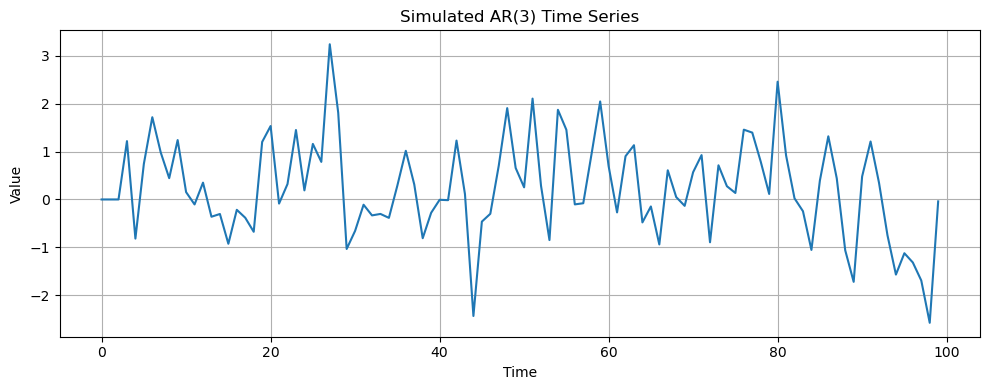

In [34]:
# Simulate AR(3) data
y = [0, 0, 0]
phi_true = [0.5, -0.3, 0.2]
sigma_true = 1.0
np.random.seed(2102)
for t in range(3, 100):
    y_t = phi_true[0]*y[-1] + phi_true[1]*y[-2] + phi_true[2]*y[-3] + np.random.normal(0, sigma_true)
    y.append(y_t)
y = np.array(y)

plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title("Simulated AR(3) Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.tight_layout()
plt.show()

## 2. Create and Fit the BAR Model

In [24]:
bar = BAR(p=3)
bar.fit(y)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phi, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


### 2.1 Refit the Model with Custom Priors
Here we re-initialize and re-fit the BAR model using Laplace priors on the AR coefficients and a HalfCauchy prior on the noise standard deviation.

In [25]:
custom_priors = {
    'phi': lambda shape: pm.Laplace("phi", mu=0, b=0.5, shape=shape),
    'sigma': lambda: pm.HalfCauchy("sigma", beta=1)
}
bar.priors = custom_priors
bar.fit(y)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phi, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


In [26]:
bar.summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
phi[0],0.224,0.103,0.030,0.419,0.002,0.002,3434.0,3110.0,1.0
phi[1],-0.202,0.110,-0.399,0.016,0.002,0.001,2604.0,2895.0,1.0
phi[2],0.434,0.100,0.256,0.634,0.002,0.001,3295.0,2903.0,1.0
sigma,0.955,0.071,0.822,1.083,0.001,0.001,3330.0,2785.0,1.0


## 3. Plot the Input Time Series

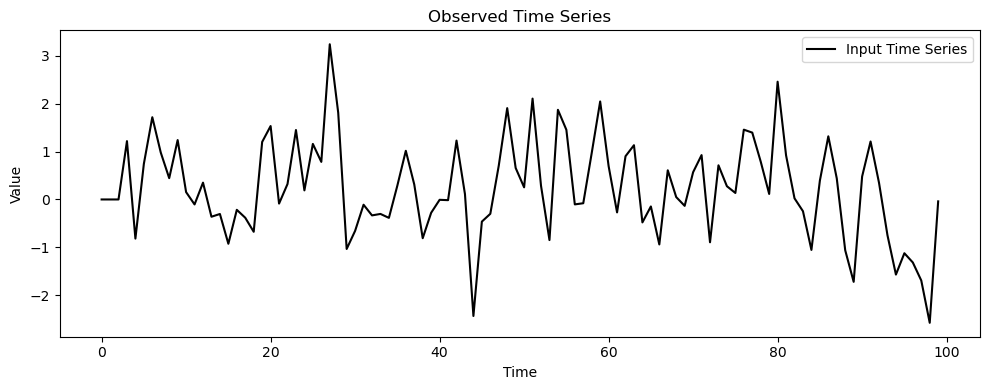

In [27]:
bar.plot_series()

## 4. Visualize Prior Distributions

Sampling: [phi, sigma]


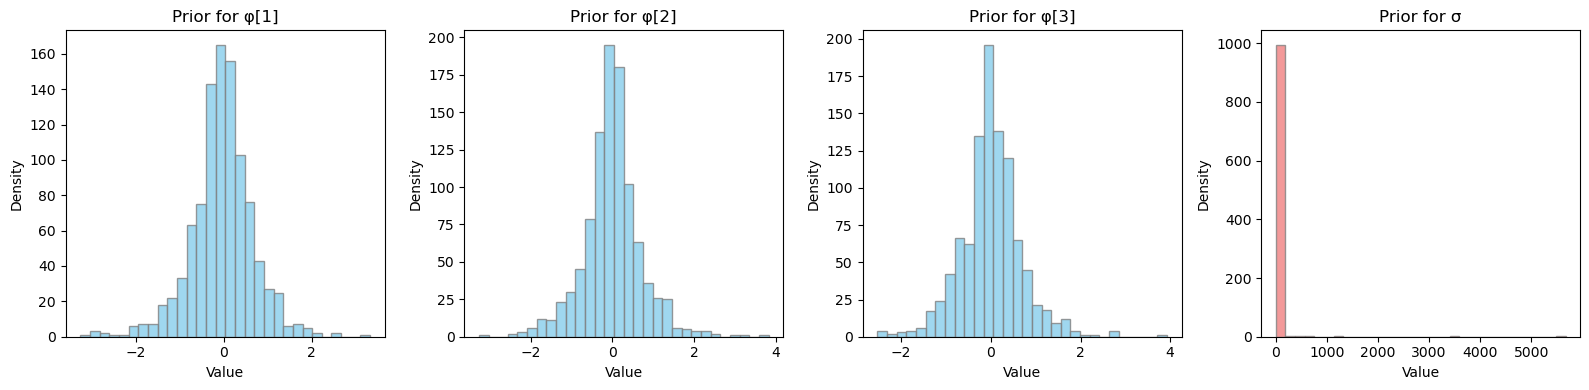

In [28]:
# bar = BAR(p=3) # Note: Can invoke plot_priors() before fit()!
bar.plot_priors()

## 5. Summarize Posterior Distributions

In [29]:
bar.summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
phi[0],0.224,0.103,0.030,0.419,0.002,0.002,3434.0,3110.0,1.0
phi[1],-0.202,0.110,-0.399,0.016,0.002,0.001,2604.0,2895.0,1.0
phi[2],0.434,0.100,0.256,0.634,0.002,0.001,3295.0,2903.0,1.0
sigma,0.955,0.071,0.822,1.083,0.001,0.001,3330.0,2785.0,1.0


## 6. Plot MCMC Trace

array([[<Axes: title={'center': 'phi'}>, <Axes: title={'center': 'phi'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

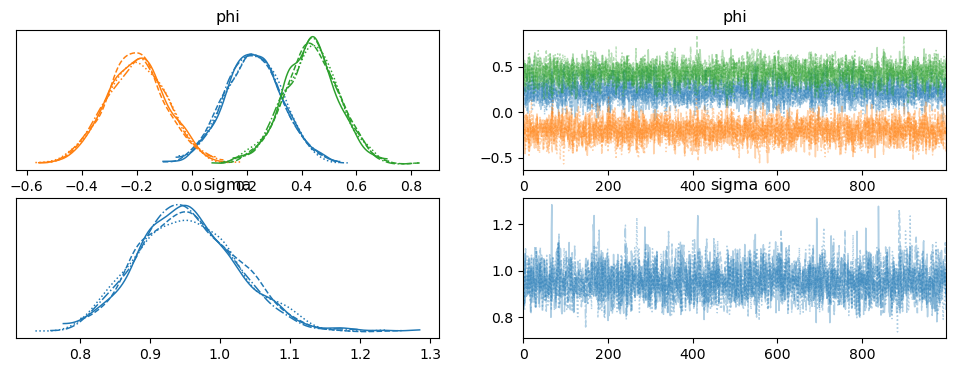

In [30]:
bar.plot_trace()

## 7. Forecast Future Values

In [31]:
forecast_mean, lower, upper, forecasts = bar.forecast(steps=10)
print("Forecast mean:", forecast_mean)

Forecast mean: [-0.227412   -1.16707519 -0.22693629  0.06918636 -0.43680219 -0.22998876
  0.05438592 -0.12465918 -0.13386373  0.0216297 ]


## 8. Plot Forecast with Credible Intervals

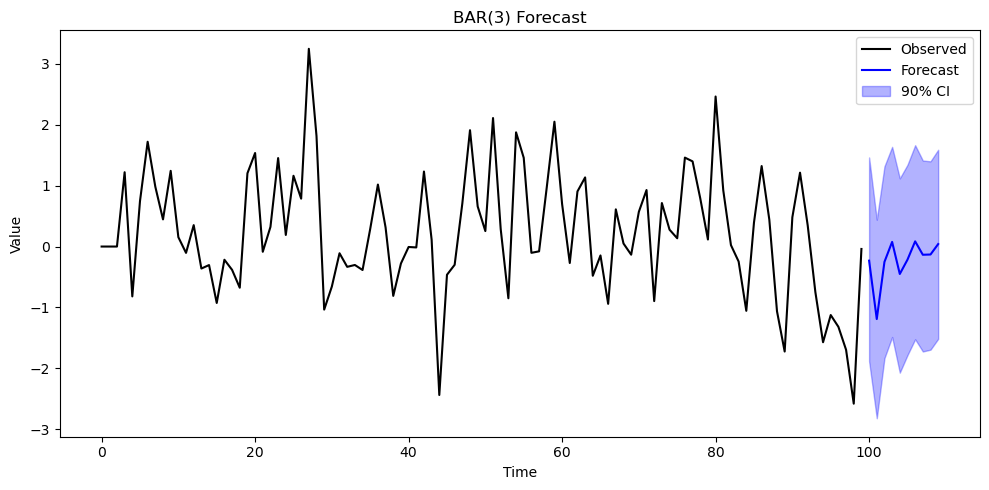

In [32]:
bar.plot_forecast(steps=10)